In [1]:
from utils3_cross_attention import train
import torch
from config import Config 

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
cfg = Config()

c:\Users\OMEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


Разморожен слой: encoder.layer.11.attention.self.query.weight
Разморожен слой: encoder.layer.11.attention.self.query.bias
Разморожен слой: encoder.layer.11.attention.self.key.weight
Разморожен слой: encoder.layer.11.attention.self.key.bias
Разморожен слой: encoder.layer.11.attention.self.value.weight
Разморожен слой: encoder.layer.11.attention.self.value.bias
Разморожен слой: encoder.layer.11.attention.output.dense.weight
Разморожен слой: encoder.layer.11.attention.output.dense.bias
Разморожен слой: encoder.layer.11.attention.output.LayerNorm.weight
Разморожен слой: encoder.layer.11.attention.output.LayerNorm.bias
Разморожен слой: encoder.layer.11.intermediate.dense.weight
Разморожен слой: encoder.layer.11.intermediate.dense.bias
Разморожен слой: encoder.layer.11.output.dense.weight
Разморожен слой: encoder.layer.11.output.dense.bias
Разморожен слой: encoder.layer.11.output.LayerNorm.weight
Разморожен слой: encoder.layer.11.output.LayerNorm.bias
Разморожен слой: pooler.dense.weight
Раз

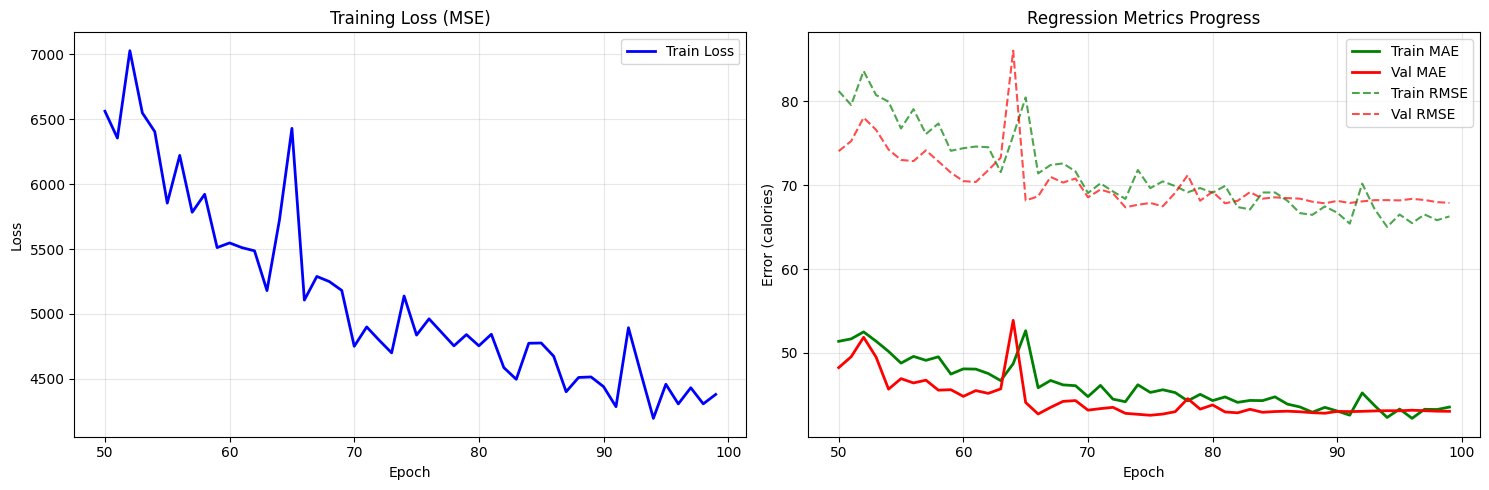

Метрики сохранены в: training_metrics.csv


In [2]:
#продолжаем обучение или нет
resume_training=True
visualizer, trained_model = train(cfg, device, resume_training)

Using device: cuda
Файл модели найден: best_model.pth

ЗАПУСК ТЕСТИРОВАНИЯ
ТЕСТИРОВАНИЕ МОДЕЛИ НА ТЕСТОВОЙ ВЫБОРКЕ
⚠️  Безопасная загрузка не удалась: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy.core.multiarray._reconstruct was not an allowed global by default. Please use `torch.serialization.add_safe_globals([numpy.core.multiarray._reconstruct])` or the `torch.serialization.safe_globals([numpy.core.multiarra

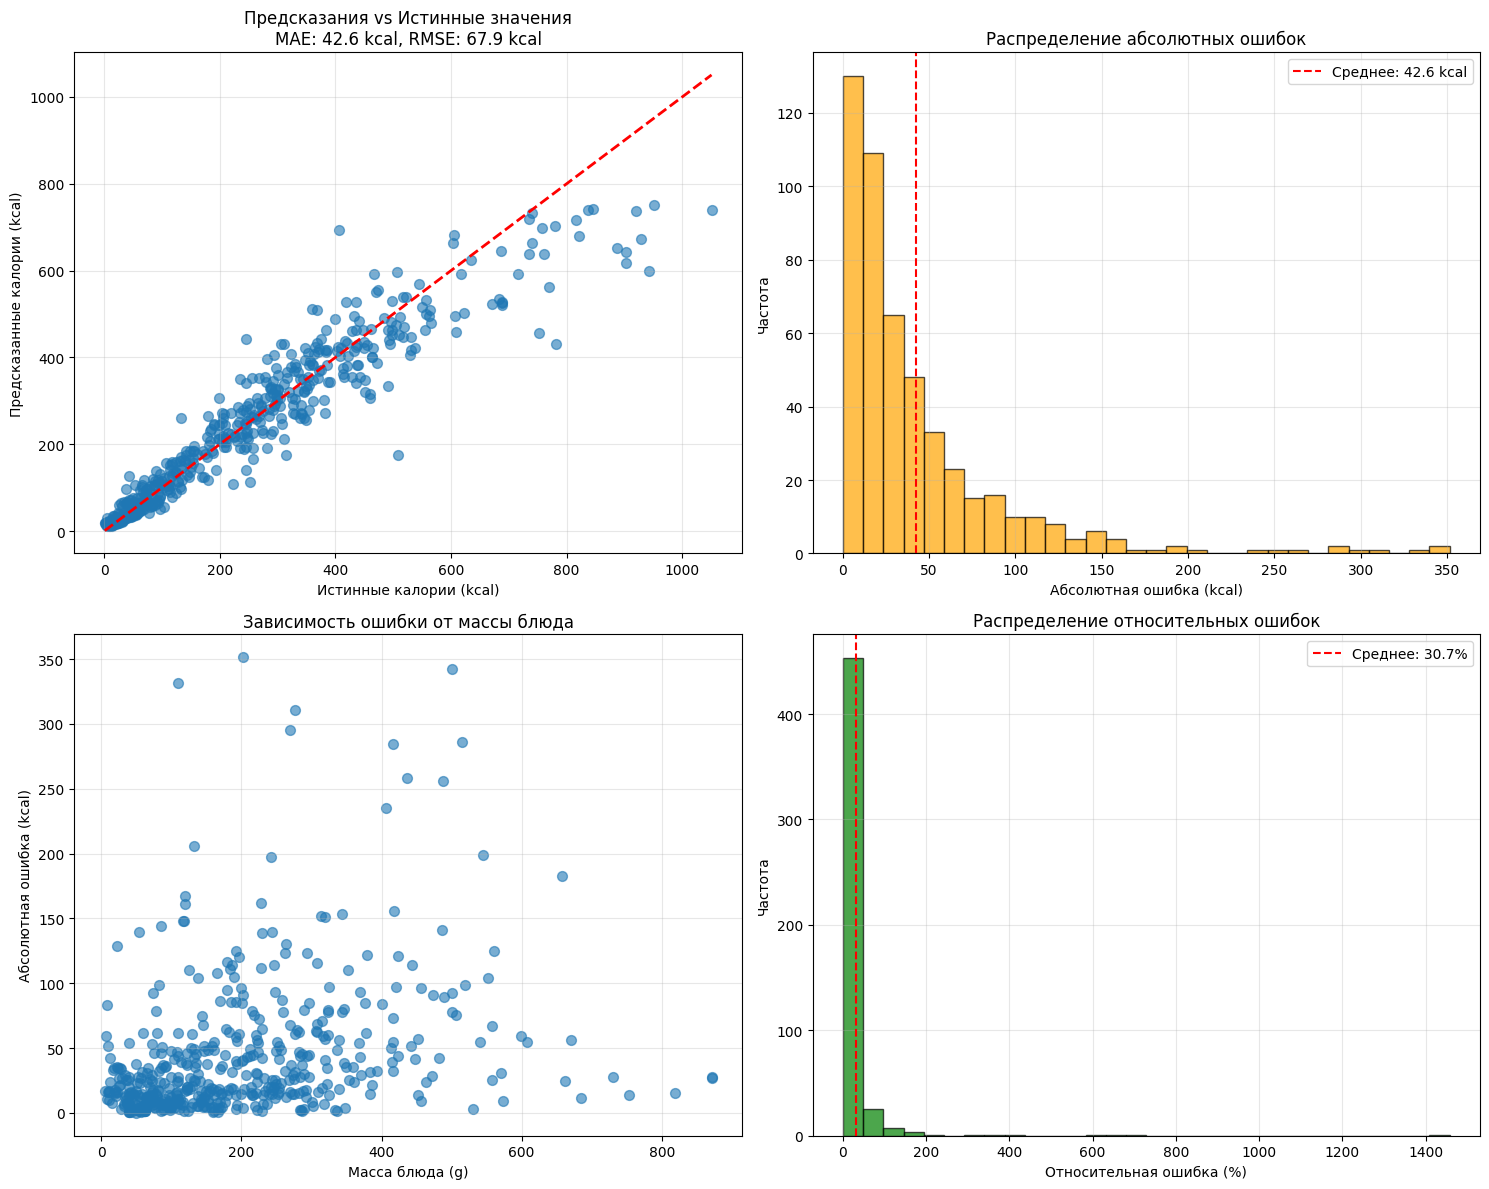


💾 Детальные результаты сохранены в: test_results_detailed.csv

АНАЛИЗ СЛОЖНЫХ СЛУЧАЕВ
Блюда с наибольшей относительной ошибкой (>50%):
   dish_1558461431: 1457.8% ошибка
      Ингредиенты: spinach (raw)
      Attention - Text: 0.625, Image: 0.375

   dish_1558549773: 714.2% ошибка
      Ингредиенты: spinach (raw)
      Attention - Text: 0.625, Image: 0.375

   dish_1559157777: 661.7% ошибка
      Ингредиенты: spinach (raw)
      Attention - Text: 0.625, Image: 0.375

   dish_1558546434: 623.5% ошибка
      Ингредиенты: spinach (raw)
      Attention - Text: 0.625, Image: 0.375

   dish_1557937574: 428.6% ошибка
      Ингредиенты: blackberries
      Attention - Text: 0.625, Image: 0.375



In [4]:
from test3_cross_attention import test_model
from config import Config as config
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Проверяем наличие обученной модели
model_path = config.SAVE_PATH
if not os.path.exists(model_path):
    print(f"Файл модели не найден: {model_path}")
else:
    print(f"Файл модели найден: {model_path}")

# Тестирование модели
print("\n" + "="*80)
print("ЗАПУСК ТЕСТИРОВАНИЯ")
print("="*80)

test_results = test_model(config, device, model_path=model_path)

if test_results is not None:
    # Дополнительный анализ сложных случаев
    print("\n" + "="*80)
    print("АНАЛИЗ СЛОЖНЫХ СЛУЧАЕВ")
    print("="*80)
    
    # Находим блюда с наибольшей относительной ошибкой
    high_relative_error = test_results.nlargest(5, 'relative_error')
    print("Блюда с наибольшей относительной ошибкой (>50%):")
    for idx, row in high_relative_error.iterrows():
        if row['relative_error'] > 50:
            print(f"   {row['dish_id']}: {row['relative_error']:.1f}% ошибка")
            print(f"      Ингредиенты: {row['ingredients']}")
            if 'text_attention' in row:
                print(f"      Attention - Text: {row['text_attention']:.3f}, Image: {row['image_attention']:.3f}")
            print()